In [1]:
### Imports ###
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 1.1 Data Exploration
### 1.1.1

In [2]:
# Reads dataset
wine_df=pd.read_csv("WineQT.csv")

# Prints frist 5 as default
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Info, like amount of entries, datatype and stuff
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
# Shows features and info about them
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### 1.1.2

Highest variance read from the statisti8cs show that both free sulfur dioxide and total sulfur dioxide, with that one being the higher one, have a high variance. This can be read from the std(Standard Deviation) row. Excluding Id as that is not a feature of the wine.

## 1.2 Correlation Analysis
### 1.2.1

In [5]:
winecorr = wine_df.corr()
winecorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


### 1.2.2

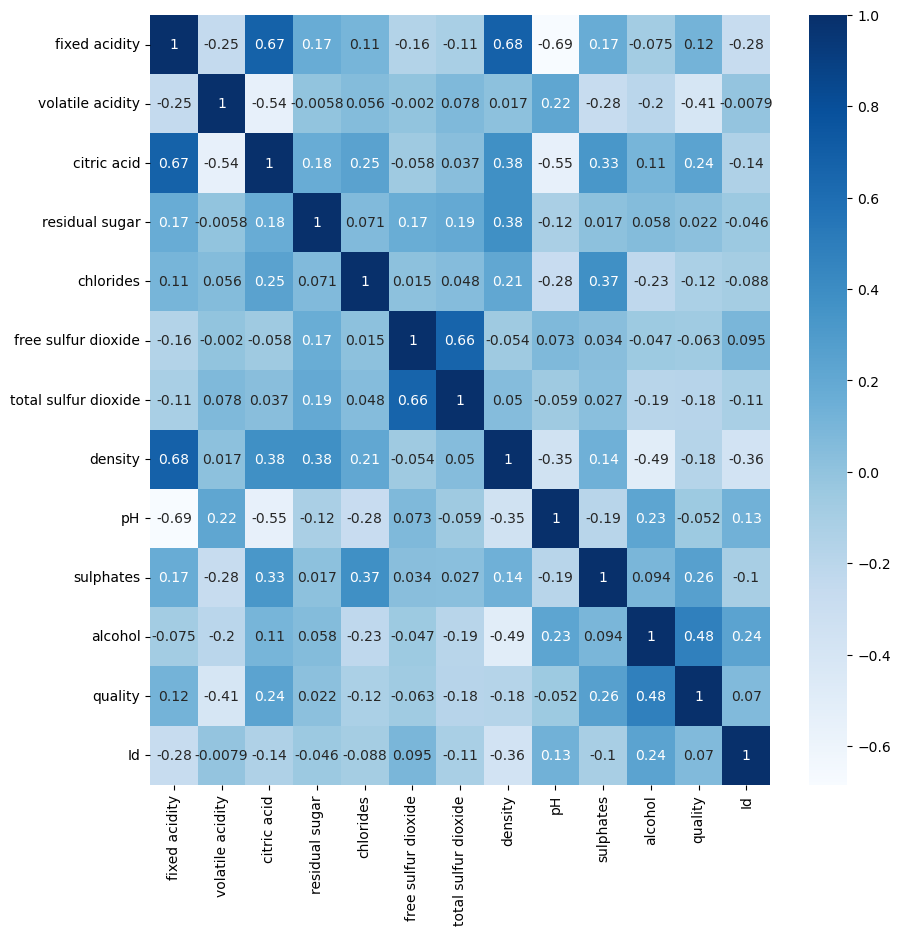

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(winecorr, cmap="Blues", annot=True, )

plt.show()

### 1.2.3
Reading from the heatmap, quality has strongest positive correlation with alcohol (0.48) and strongest negative correlation with volatile acidity (-0.41)

### 1.2.4
Since quality has a higher correlation with alcohol than pH, I expect alcohol to predict the wine quality. This is because the numbers suggests that alcohol contributes more to the variation in wine quality in the dataset, given the higher correlation, and thus more predictive power than pH

## 1.3 Linear Regression
### 1.3.1

C:\Users\aston\AppData\Local\Temp\ipykernel_17896\945186473.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Intercept:", float(theta[0]))
C:\Users\aston\AppData\Local\Temp\ipykernel_17896\945186473.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Regression Coefficient:", float(theta[1]))


Intercept: 5.671691943495344
Regression Coefficient: -0.17282395668538456
R^2: 0.002412795743836016


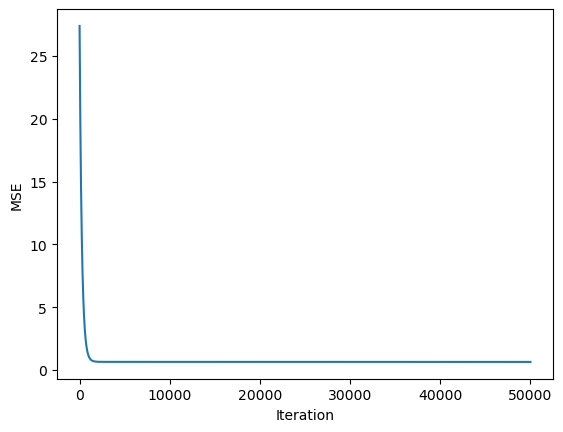

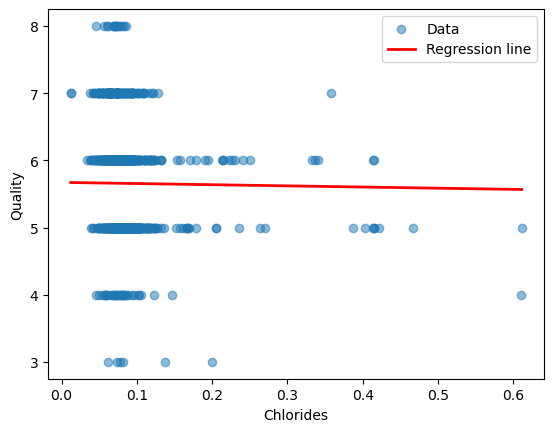

In [7]:
# Data
X = wine_df[["chlorides"]].values          # shape (m,1)
y = wine_df["quality"].values.reshape(-1,1)  # shape (m,1)

# Designmatrise med bias/intercept
X_b = np.c_[np.ones((len(X), 1)), X]       # shape (m,2)

# Hyperparametre
eta = 0.001
n_iterations = 50000
m = len(X_b)

# Init
np.random.seed(42)
theta = np.random.randn(2,1)

# Tren (batch gradient descent)
costs = []
for _ in range(n_iterations):
    y_hat = X_b @ theta                     # (m,1)
    gradients = (2/m) * (X_b.T @ (y_hat - y))  # (2,1)
    theta -= eta * gradients
    costs.append(np.mean((y_hat - y)**2))

print("Intercept:", float(theta[0]))
print("Regression Coefficient:", float(theta[1]))
print("R^2:", 1 - np.sum((y - X_b @ theta)**2) / np.sum((y - np.mean(y))**2))

# Cost-plot
plt.plot(costs)
plt.xlabel("Iteration"); plt.ylabel("MSE")
plt.show()

# Scatter + regresjonslinje
plt.scatter(X, y, alpha=0.5, label="Data")
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
X_line_b = np.c_[np.ones((len(x_line),1)), x_line]
y_line = X_line_b @ theta
plt.plot(x_line, y_line, linewidth=2, label="Regression line", color="red")
plt.xlabel("Chlorides"); plt.ylabel("Quality"); plt.legend()
plt.show()

### 1.3.2

Intercept: 1.8870128607874066
Regression Coefficient: 0.36104096800424457
R^2 score: 0.2350952433535366


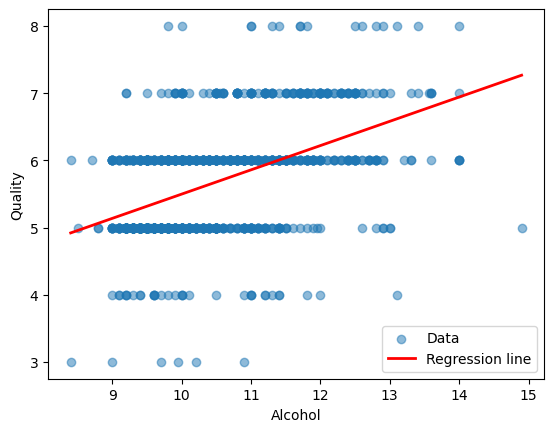

In [8]:
X = wine_df[["alcohol"]].values   # forklaringsvariabel
y = wine_df["quality"].values     # responsvariabel

# Modell
model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Regression Coefficient:", model.coef_[0])
print("R^2 score:", model.score(X, y))

plt.scatter(X, y, alpha=0.5, label="Data")
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

plt.plot(x_line, y_line, color="red", linewidth=2, label="Regression line")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.legend()
plt.show()

### 1.3.3

Using chlorides to predict quality in a gradient descent gives the values for intercept and regression coefficient:
 - Intercept: 5.671692691173761
 - Regression Coefficient: -0.17283253829536807

Using alcohol to predict quality gives the values:
 - Intercept: 1.8870128607874066
 - Regression Coefficient: 0.36104096800424457

This means that alcohol has more impact when predicting quality since, its a positive value, while the other is negative. The intercept gives the predicted value of quality if the variables used to predict is set to 0. The intercept of 5.6 for the chlorides model is close to the average wine quality (5–6), which makes sense since most wines in the dataset are around that level. 

### 1.3.4

Both lines fit the data points given however theres a big difference in how well the lines explain the data. 
The regression line for chlorides shows a weak downwards line. Since the R^2-score is low (R^2: 0.002412795743836016), whih means the line does not explain the data well

For alcohol its different. The points shows a clear trend to follow the line. The R^2-score is significantly higher (R^2 score: 0.2350952433535366), meaning the line explains the data well.

## 1.4


In [9]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

def train_gd(X, y, eta=0.001, n_iter=5000, seed=42):
    np.random.seed(seed)
    X = X.reshape(-1,1).astype(float)
    y = y.reshape(-1,1).astype(float)

    # legg til bias
    X_b = np.c_[np.ones((len(X),1)), X]
    theta = np.random.randn(2,1)
    m = len(X_b)

    last_cost = np.inf
    for _ in range(n_iter):
        y_hat = X_b @ theta
        gradients = (2/m) * (X_b.T @ (y_hat - y))
        theta -= eta * gradients

        # enkel sikkerhet: stopp hvis kost blir NaN/Inf eller øker mye
        cost = np.mean((y_hat - y)**2)
        if not np.isfinite(cost) or cost > last_cost*1e6:
            break
        last_cost = cost
    return theta

def evaluate(theta, X, y):
    X = X.reshape(-1,1).astype(float)
    y = y.reshape(-1,1).astype(float)
    X_b = np.c_[np.ones((len(X),1)), X]
    y_pred = X_b @ theta
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    return mse, rmse, r2

def run_5fold(wine_df, feature, k=5, eta=0.001, n_iter=5000, seed=42):
    # dropp NaN
    df = wine_df[[feature, "quality"]].dropna()
    X_all = df[feature].to_numpy().astype(float)
    y_all = df["quality"].to_numpy().astype(float)

    kf = KFold(n_splits=k, shuffle=True, random_state=seed)
    mses, rmses, r2s = [], [], []
    print(f"\n=== {feature.upper()} : {k}-fold train/test ===")

    for i,(tr,te) in enumerate(kf.split(X_all), 1):
        X_tr, X_te = X_all[tr], X_all[te]
        y_tr, y_te = y_all[tr], y_all[te]

        # STANDARDISER X på treningsdata (viktig for stabil GD)
        mu, sigma = X_tr.mean(), X_tr.std()
        if sigma == 0:  # fallback i ekstremtilfelle
            sigma = 1.0
        X_tr_s = (X_tr - mu) / sigma
        X_te_s = (X_te - mu) / sigma

        theta_s = train_gd(X_tr_s, y_tr, eta=eta, n_iter=n_iter, seed=seed)

        # konverter tilbake til original skala:
        # y = a + b * ((x - mu)/sigma) = (a - b*mu/sigma) + (b/sigma) * x
        a_s, b_s = float(theta_s[0]), float(theta_s[1])
        intercept = a_s - b_s * mu / sigma
        coef      = b_s / sigma
        theta = np.array([[intercept],[coef]])

        mse, rmse, r2 = evaluate(theta, X_te, y_te)
        mses.append(mse); rmses.append(rmse); r2s.append(r2)
        print(f"Fold {i}: Intercept={intercept:.4f}, Coef={coef:.4f} | MSE={mse:.4f}, RMSE={rmse:.4f}, R2={r2:.4f}")

    print(f"Mean : MSE={np.mean(mses):.4f}, RMSE={np.mean(rmses):.4f}, R2={np.mean(r2s):.4f}")
    print(f"Var  : MSE={np.var(mses):.6f}, RMSE={np.var(rmses):.6f}, R2={np.var(r2s):.6f}")

# Kjør:
run_5fold(wine_df, "alcohol",   eta=0.001, n_iter=10000, seed=42)
run_5fold(wine_df, "chlorides", eta=0.001, n_iter=10000, seed=42)



=== ALCOHOL : 5-fold train/test ===


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


Fold 1: Intercept=1.8197, Coef=0.3675 | MSE=0.4175, RMSE=0.6462, R2=0.2497


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


Fold 2: Intercept=1.8787, Coef=0.3618 | MSE=0.5900, RMSE=0.7681, R2=0.1988


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


Fold 3: Intercept=1.8910, Coef=0.3611 | MSE=0.5140, RMSE=0.7169, R2=0.2415


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


Fold 4: Intercept=2.0141, Coef=0.3493 | MSE=0.4998, RMSE=0.7070, R2=0.2677


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


Fold 5: Intercept=1.8292, Coef=0.3656 | MSE=0.4632, RMSE=0.6806, R2=0.2126
Mean : MSE=0.4969, RMSE=0.7038, R2=0.2341
Var  : MSE=0.003280, RMSE=0.001635, R2=0.000627

=== CHLORIDES : 5-fold train/test ===


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


Fold 1: Intercept=5.8639, Coef=-2.3985 | MSE=0.5591, RMSE=0.7478, R2=-0.0048


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


Fold 2: Intercept=5.8452, Coef=-2.1190 | MSE=0.7266, RMSE=0.8524, R2=0.0133


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


Fold 3: Intercept=5.8175, Coef=-1.7596 | MSE=0.6591, RMSE=0.8118, R2=0.0274


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


Fold 4: Intercept=5.8265, Coef=-1.9330 | MSE=0.6658, RMSE=0.8160, R2=0.0246
Fold 5: Intercept=5.8533, Coef=-2.3948 | MSE=0.5916, RMSE=0.7692, R2=-0.0057
Mean : MSE=0.6405, RMSE=0.7994, R2=0.0110
Var  : MSE=0.003483, RMSE=0.001365, R2=0.000198


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


### 1.4.1

In [10]:
ETA = 0.1
N_ITER = 5000
SEED = 42

# Kjør for alcohol (oppg. 1.4.1)
run_5fold(wine_df, "alcohol", eta=ETA, n_iter=N_ITER, seed=SEED)


=== ALCOHOL : 5-fold train/test ===


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


Fold 1: Intercept=1.8197, Coef=0.3675 | MSE=0.4175, RMSE=0.6462, R2=0.2497


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


Fold 2: Intercept=1.8787, Coef=0.3618 | MSE=0.5900, RMSE=0.7681, R2=0.1988


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


Fold 3: Intercept=1.8910, Coef=0.3611 | MSE=0.5140, RMSE=0.7169, R2=0.2415


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


Fold 4: Intercept=2.0141, Coef=0.3493 | MSE=0.4998, RMSE=0.7070, R2=0.2677
Fold 5: Intercept=1.8292, Coef=0.3656 | MSE=0.4632, RMSE=0.6806, R2=0.2126
Mean : MSE=0.4969, RMSE=0.7038, R2=0.2341
Var  : MSE=0.003280, RMSE=0.001635, R2=0.000627


C:\Users\aston\AppData\Local\Temp\ipykernel_17896\2691856972.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_s, b_s = float(theta_s[0]), float(theta_s[1])


## 1.5 Multiple Linear Regression

In [15]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

def train_gd_multi(X, y, eta=0.001, n_iter=10000, seed=42):
    np.random.seed(seed)
    X = X.astype(float)
    y = y.reshape(-1,1).astype(float)
    X_b = np.c_[np.ones((len(X),1)), X]
    theta = np.random.randn(X_b.shape[1], 1)
    m = len(X_b)
    for _ in range(n_iter):
        y_hat = X_b @ theta
        gradients = (2/m) * (X_b.T @ (y_hat - y))
        theta -= eta * gradients
    return theta

def evaluate(theta, X, y):
    X = X.astype(float)
    y = y.reshape(-1,1).astype(float)
    X_b = np.c_[np.ones((len(X),1)), X]
    y_pred = X_b @ theta
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    return mse, rmse, r2

def run_5fold_multi(wine_df, eta=0.001, n_iter=10000, seed=42):
    # Fjern rader med NaN
    df = wine_df.dropna()
    X = df.drop(columns=["quality"]).to_numpy()
    y = df["quality"].to_numpy()

    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    mses, rmses, r2s = [], [], []

    print("\n=== MULTIPLE LINEAR REGRESSION (all features) ===")
    for i,(tr,te) in enumerate(kf.split(X), 1):
        # Standardiser input for stabilitet
        mu, sigma = X[tr].mean(axis=0), X[tr].std(axis=0)
        sigma[sigma == 0] = 1.0
        X_tr_s = (X[tr] - mu) / sigma
        X_te_s = (X[te] - mu) / sigma

        theta_s = train_gd_multi(X_tr_s, y[tr], eta=eta, n_iter=n_iter, seed=seed)

        # konverter tilbake til original skala
        a = theta_s[0,0]
        b = theta_s[1:,0]
        intercept = a - np.sum(b * mu / sigma)
        coefs = b / sigma
        theta = np.vstack([[intercept], coefs.reshape(-1,1)])

        mse, rmse, r2 = evaluate(theta, X[te], y[te])
        mses.append(mse); rmses.append(rmse); r2s.append(r2)
        print(f"Fold {i}: MSE={mse:.4f}, RMSE={rmse:.4f}, R2={r2:.4f}")

    print(f"Mean : MSE={np.mean(mses):.4f}, RMSE={np.mean(rmses):.4f}, R2={np.mean(r2s):.4f}")
    print(f"Var  : MSE={np.var(mses):.6f}, RMSE={np.var(rmses):.6f}, R2={np.var(r2s):.6f}")


In [16]:
run_5fold_multi(wine_df, eta=0.001, n_iter=10000, seed=42)



=== MULTIPLE LINEAR REGRESSION (all features) ===
Fold 1: MSE=0.3841, RMSE=0.6197, R2=0.3098
Fold 2: MSE=0.4855, RMSE=0.6968, R2=0.3407
Fold 3: MSE=0.4357, RMSE=0.6600, R2=0.3571
Fold 4: MSE=0.4105, RMSE=0.6407, R2=0.3986
Fold 5: MSE=0.3755, RMSE=0.6128, R2=0.3617
Mean : MSE=0.4182, RMSE=0.6460, R2=0.3536
Var  : MSE=0.001576, RMSE=0.000920, R2=0.000838


## Exercise 2.0
### 2.1

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

X = wine_df.drop(columns=["quality", "Id"])
y = wine_df["quality"]

# standardiser features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# tren lineær modell
model = LinearRegression()
model.fit(X_scaled, y)

# lag feature importance (abs coeff)
importance = pd.Series(abs(model.coef_), index=X.columns).sort_values(ascending=False)
print(importance)


alcohol                 0.303037
volatile acidity        0.202735
sulphates               0.149068
total sulfur dioxide    0.091256
chlorides               0.080705
pH                      0.063923
fixed acidity           0.040133
density                 0.033576
citric acid             0.025924
free sulfur dioxide     0.024277
residual sugar          0.018313
dtype: float64


### 2.1 
a:

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

X = wine_df.drop(columns=["quality","Id"])
y = wine_df["quality"]

# Lag polynomial features (kvadratiske + interaksjoner)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Tren lineær regresjon på utvidet feature space
model = LinearRegression()
scores = cross_val_score(model, X_poly, y, cv=5, scoring="r2")

print("R² scores (5 folds):", scores)
print("Mean R²:", np.mean(scores))


R² scores (5 folds): [0.01595137 0.34146146 0.30449067 0.27894381 0.17148788]
Mean R²: 0.2224670389271619


B:

In [20]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

X = wine_df.drop(columns=["quality","Id"])
y = wine_df["quality"]

# Ridge (L2)
ridge = Ridge(alpha=1.0)
ridge_r2 = cross_val_score(ridge, X, y, cv=5, scoring="r2")
print("Ridge R²:", ridge_r2, "Mean:", np.mean(ridge_r2))

# Lasso (L1)
lasso = Lasso(alpha=0.001, max_iter=10000)
lasso_r2 = cross_val_score(lasso, X, y, cv=5, scoring="r2")
print("Lasso R²:", lasso_r2, "Mean:", np.mean(lasso_r2))

# Tren på hele datasettet for å se koeffisientene
ridge.fit(X, y)
lasso.fit(X, y)

print("Ridge coefficients:", ridge.coef_)
print("Lasso coefficients:", lasso.coef_)


Ridge R²: [0.22011824 0.36210823 0.32688914 0.35381423 0.29839326] Mean: 0.3122646174779743
Lasso R²: [0.22328061 0.3594209  0.32805244 0.35167831 0.29597134] Mean: 0.3116807192419184
Ridge coefficients: [ 0.01307632 -1.14757136 -0.15447286  0.00388973 -1.08721224  0.0024338
 -0.00270635 -0.01508814 -0.41934987  0.76538294  0.30328371]
Lasso coefficients: [ 0.01140504 -1.12590324 -0.07558074  0.00282341 -1.07263765  0.00250643
 -0.00274972 -0.         -0.3574707   0.74434803  0.29998041]


C:

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

X = wine_df.drop(columns=["quality","Id"])
y = wine_df["quality"]

# Decision Tree
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_r2 = cross_val_score(tree, X, y, cv=5, scoring="r2")
print("Decision Tree R²:", tree_r2, "Mean:", np.mean(tree_r2))

# Random Forest
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest_r2 = cross_val_score(forest, X, y, cv=5, scoring="r2")
print("Random Forest R²:", forest_r2, "Mean:", np.mean(forest_r2))


Decision Tree R²: [0.1885278  0.31382761 0.28115809 0.11879571 0.1391525 ] Mean: 0.20829234347913542
Random Forest R²: [0.28320546 0.3634414  0.3676204  0.33169483 0.29514852] Mean: 0.3282221213121425
